In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
upload=files.upload()

Saving GBcomments.csv to GBcomments.csv


In [2]:
comment=pd.read_csv("GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comment.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [4]:
from textblob import TextBlob

In [5]:
TextBlob("Its more accureate to cell at it M+ (1000) be").sentiment.polarity

0.5

In [6]:
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
comment.dropna(inplace=True)

In [8]:
polarity=[]
for i in comment['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)

In [9]:
comment['polarity'] =polarity

In [10]:
comment.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

In [11]:
comment_positive=comment[comment['polarity']==1]

In [12]:
comment_positive.shape

(20400, 5)

In [13]:
comment_positive.head()

video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [14]:
# !pip install wordcloud

In [15]:
from wordcloud import WordCloud,STOPWORDS

In [16]:
stopwords=set(STOPWORDS)
total_comment=' '.join(comment_positive['comment_text'])

In [17]:
total_comment

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [18]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comment)

In [19]:
wordcloud

(-0.5, 999.5, 499.5, -0.5)

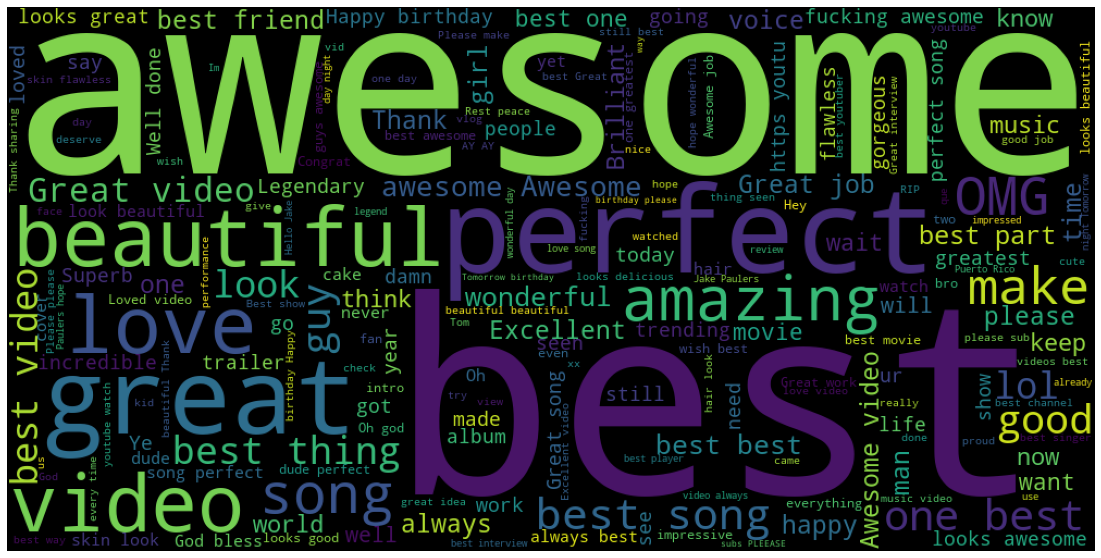

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")

# It is negative sentance

In [21]:
comment_negative=comment[comment['polarity']==-1]

In [22]:
comment_negative.head()

video_id  ... polarity
1387  ql0Op1VcELw  ...     -1.0
1394  ql0Op1VcELw  ...     -1.0
1530  -Ifnaxi2LQg  ...     -1.0
1745  F2uJvwiSZAQ  ...     -1.0
1793  F2uJvwiSZAQ  ...     -1.0

[5 rows x 5 columns]

In [23]:
comment_negative.shape

(3339, 5)

In [24]:
from wordcloud import WordCloud,STOPWORDS

In [25]:
stopwords=set(STOPWORDS)

In [26]:
t0tal_comment=' '.join(comment_negative['comment_text'])

In [32]:
word_cload=WordCloud(width=1000,height=500,stopwords=stopwords).generate(t0tal_comment)

(-0.5, 999.5, 499.5, -0.5)

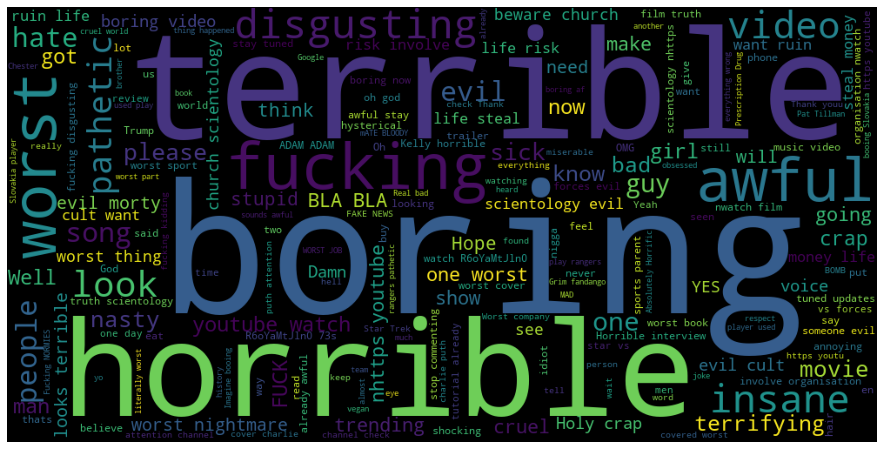

In [33]:
plt.figure(figsize=(20,8))
plt.imshow(word_cload)
plt.axis('off')

# Analysing Tags column,what are trending tags on youtube

In [34]:
from google.colab import files
upload=files.upload()

Saving USvideos.csv to USvideos.csv


In [35]:
videos=pd.read_csv("USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [36]:
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [37]:
videos.shape

(7992, 11)

In [38]:
videos.dtypes

video_id           object
title              object
channel_title      object
category_id         int64
tags               object
views               int64
likes               int64
dislikes            int64
comment_total       int64
thumbnail_link     object
date              float64
dtype: object

In [39]:
videos.isnull().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [40]:
total_tags=' '.join(videos['tags'])

In [41]:
total_tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [42]:
import re

In [43]:
tags =re.sub('[^a-zA-z]',' ',total_tags)

In [44]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone [none] apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [46]:
tags=re.sub(' +',' ',tags)

In [47]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

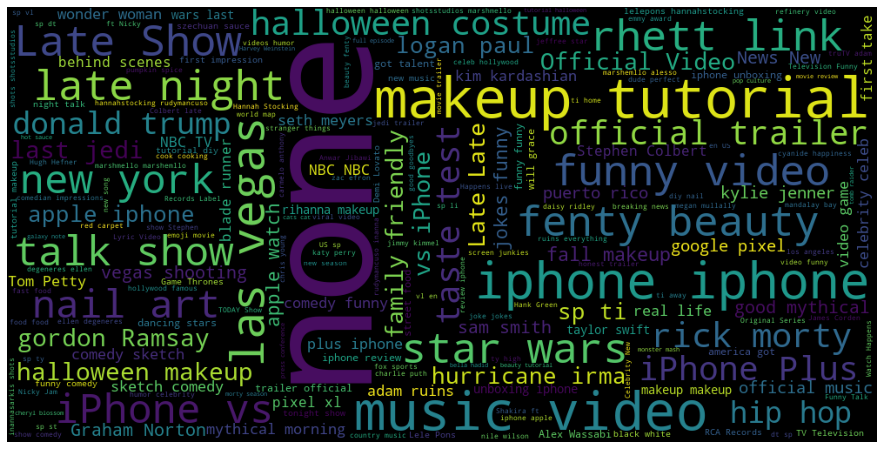

In [ ]:
plt.figure(figsize=(20,8))
